In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from sklearn.metrics import classification_report

# 데이터 탐색 및 전처리

### 데이터 로드

In [53]:
file = "C:/Users/송이두/Desktop/가천대/2-1/인공지능개론/과제/data/kc_house_data.csv"
house = pd.read_csv(file)

### 데이터 구조 확인

In [54]:
house.shape

(21613, 21)

In [55]:
#데이터셋 최상위 5행 출력
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [56]:
#데이터셋 컬럼명 출력
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [57]:
#데이터셋 전반적인 정보 출력
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [58]:
#데이터셋 통계 정보 출력
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### id 컬럼 제거

In [59]:
house = house.drop('id', axis=1)
house.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


### date 컬럼 분리

In [60]:
#date 컬럼의 값을 각각 year, month, day로 분리한다.

house['date'] = pd.to_datetime(house['date'], format='%Y%m%dT%H%M%S')

house['year'] = house['date'].dt.year
house['month'] = house['date'].dt.month
house['day'] = house['date'].dt.day
house = house.drop('date', axis=1)

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

### 범주형 데이터 처리: 원-핫 인코딩

In [61]:
house.nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
year                2
month              12
day                31
dtype: int64

In [62]:
columns_to_encode = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']

house_1hot = pd.get_dummies(house, columns=columns_to_encode, dummy_na=False)

In [63]:
house_1hot.shape

(21613, 157)

In [64]:
house_1hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Columns: 157 entries, price to zipcode_98199
dtypes: bool(143), float64(3), int32(3), int64(8)
memory usage: 5.0 MB


### 결측치 확인

In [67]:
house.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

### 이상치 확인

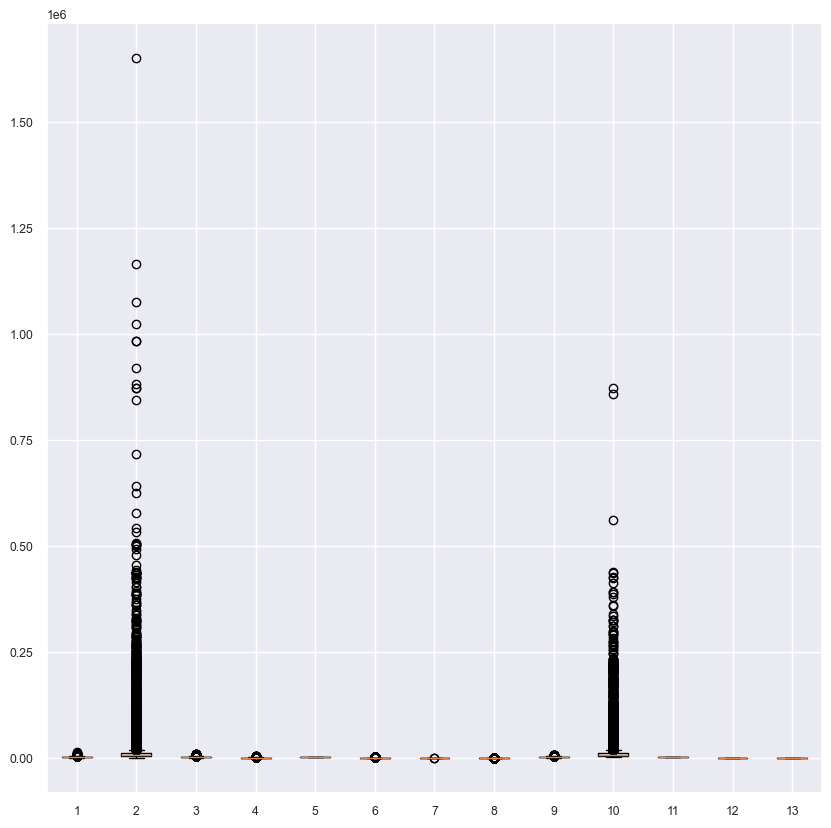

In [68]:
house_num = house_1hot.select_dtypes(include='number').drop('price', axis=1)

plt.figure(figsize=(10, 10))
plt.boxplot(house_num.values)
plt.show()

### 이상치 제거

In [69]:
house_cleaned = house_1hot.copy()
house_num = house_cleaned.select_dtypes(include=np.number)
cols_to_clean = house_num.columns.tolist()
outlier_factor = 1.5
all_outlier_indices = set()

# 각 컬럼별로 IQR 기반 이상치 탐지 및 인덱스 저장
for col in cols_to_clean:
    q1 = house_num[col].quantile(0.25)
    q3 = house_num[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - outlier_factor * iqr
    upper_bound = q3 + outlier_factor * iqr
    col_outliers_indices = house_num[(house_num[col] < lower_bound) | (house_num[col] > upper_bound)].index
    all_outlier_indices.update(col_outliers_indices)

# 이상치 인덱스를 기준으로 행 제거 (합집합)
print(f"Number of outlier rows to be removed: {len(all_outlier_indices)}")
house_filtered = house_cleaned.drop(list(all_outlier_indices))
print(f"Shape of DataFrame before outlier removal: {house_cleaned.shape}")
print(f"Shape of DataFrame after outlier removal: {house.shape}")

Number of outlier rows to be removed: 4742
Shape of DataFrame before outlier removal: (21613, 157)
Shape of DataFrame after outlier removal: (21613, 22)


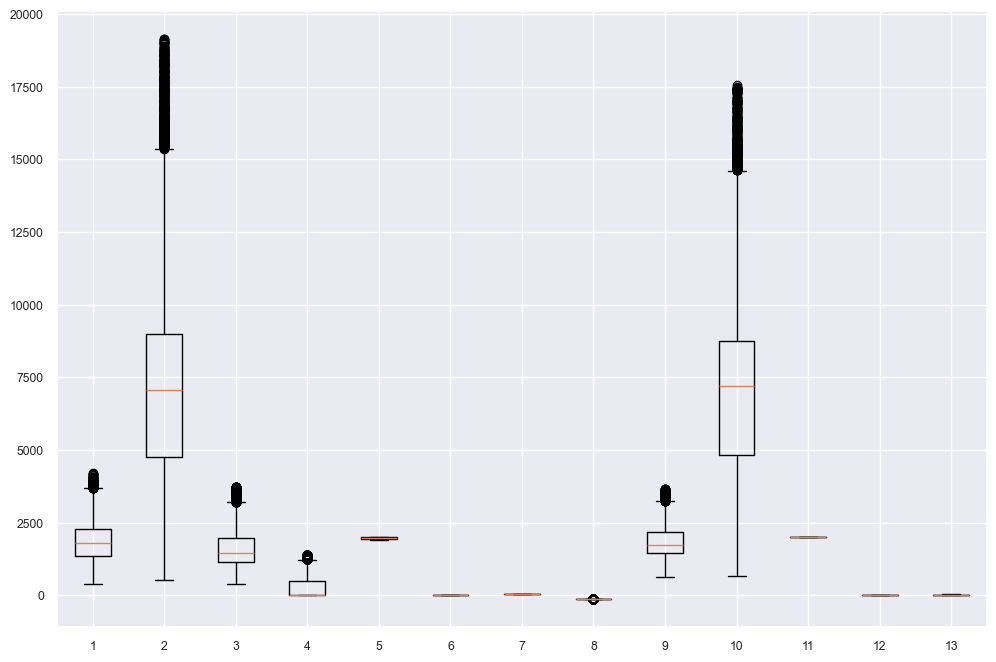

In [70]:
house_num = house_filtered.select_dtypes(include='number').drop('price', axis=1)

plt.figure(figsize=(12, 8))
plt.boxplot(house_num.values)
plt.show()

### 상관관계 행렬

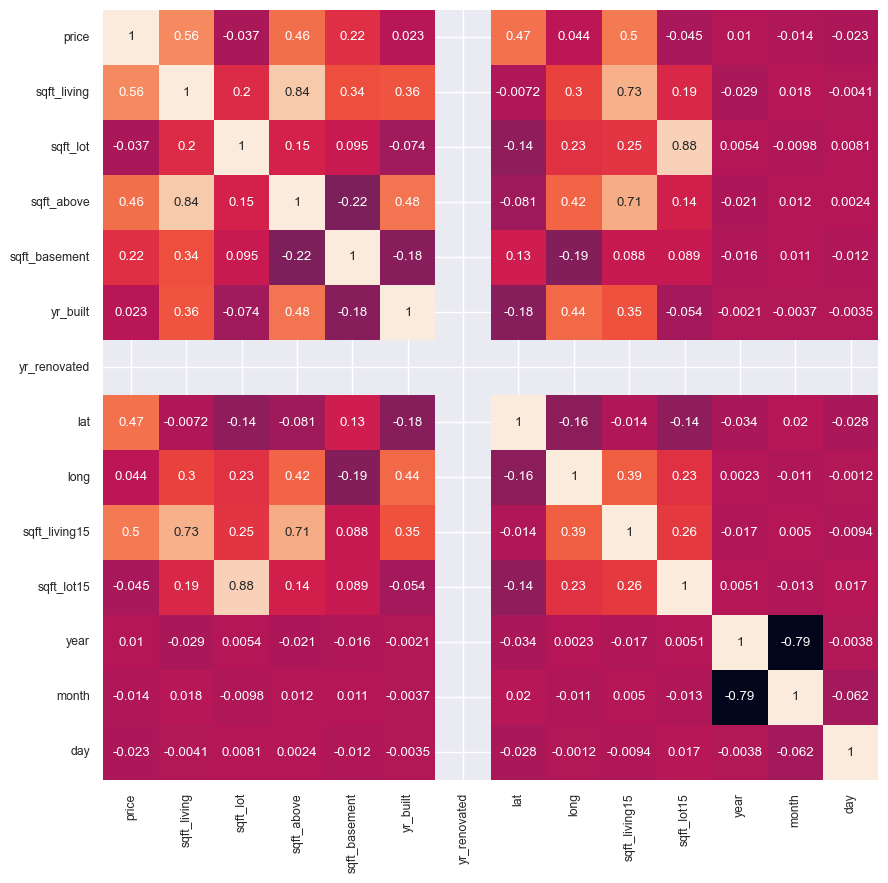

In [71]:
house_corr=house_filtered.select_dtypes(include='number').corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(house_corr, annot=True, cbar=False)
plt.show()

### Feature Selection

In [72]:
#price와 상관관계가 0.1 미만인 특성은 모두 제거한다.
house_corr = house_filtered.corr()
to_remove_features = house_corr[abs(house_corr['price']) < 0.1].index.tolist()
house_selected = house_filtered.drop(to_remove_features, axis=1)

print(to_remove_features)
print(house.head(3))
print(house.shape)

['sqft_lot', 'yr_built', 'long', 'sqft_lot15', 'year', 'month', 'day', 'bedrooms_0', 'bedrooms_1', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_33', 'bathrooms_0.0', 'bathrooms_0.5', 'bathrooms_0.75', 'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_3.0', 'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_5.0', 'bathrooms_5.25', 'floors_1.5', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'waterfront_0', 'waterfront_1', 'view_1', 'condition_1', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_11', 'zipcode_98005', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98032', 'zipcode_98034', 'zipcode_98039', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipco

### 데이터 스케일링

In [73]:
#X와 y 분리
X = house_selected.drop('price', axis=1)
y = house_selected['price']

X.shape, y.shape

((16871, 63), (16871,))

In [74]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

print(X[:1], X_scaled[:1])
X.shape, X_scaled.shape, y.shape, y_scaled.shape

   sqft_living  sqft_above  sqft_basement  yr_renovated      lat  \
0         1180        1180              0             0  47.5112   

   sqft_living15  bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  ...  \
0           1340       False        True       False       False  ...   

   zipcode_98045  zipcode_98052  zipcode_98074  zipcode_98075  zipcode_98112  \
0          False          False          False          False          False   

   zipcode_98115  zipcode_98119  zipcode_98168  zipcode_98198  zipcode_98199  
0          False          False          False          False          False  

[1 rows x 63 columns] [[-1.0236025  -0.67913517 -0.66777508  0.         -0.34965478 -0.91972339
  -0.40971519  1.03775817 -0.64881053 -0.24766143  0.          1.97666727
  -0.58576919 -0.22761366 -0.12920054 -0.14341345  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.96373003 -0.74214953  0.25840289 -0.18648523
  -0.11063343 -0.064

((16871, 63), (16871, 63), (16871,), (16871, 1))

# 모델 훈련 및 테스트

### 트레인, 테스트 분리

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13496, 63), (3375, 63), (13496, 1), (3375, 1))

In [76]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

### 모델링

In [84]:
model = Sequential()

model.add(Dense(20,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.0005), loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 20)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,481 (13.60 KB)

 Trainable params: 3,481 (13.60 KB)

 Non-trainable params: 0 (0.00 B)

### 학습

In [85]:
N_EPOCHS = 30

model_history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_split=0.2)
y_pred = model.predict(X_test)

Epoch 1/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.7237 - mse: 0.7237 - val_loss: 0.3360 - val_mse: 0.3360
Epoch 2/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3250 - mse: 0.3250 - val_loss: 0.2947 - val_mse: 0.2947
Epoch 3/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2809 - mse: 0.2809 - val_loss: 0.2796 - val_mse: 0.2796
Epoch 4/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2565 - mse: 0.2565 - val_loss: 0.2659 - val_mse: 0.2659
Epoch 5/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2476 - mse: 0.2476 - val_loss: 0.2551 - val_mse: 0.2551
Epoch 6/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2366 - mse: 0.2366 - val_loss: 0.2410 - val_mse: 0.2410
Epoch 7/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2263 - mse: 0.2263 - val_loss: 0.2302 - val_mse: 0.2302
Epoch 8/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2111 - mse: 0.2111 - val_loss: 0.2237 - val_mse: 0.2237
Epoch 9/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - lo

### 평가

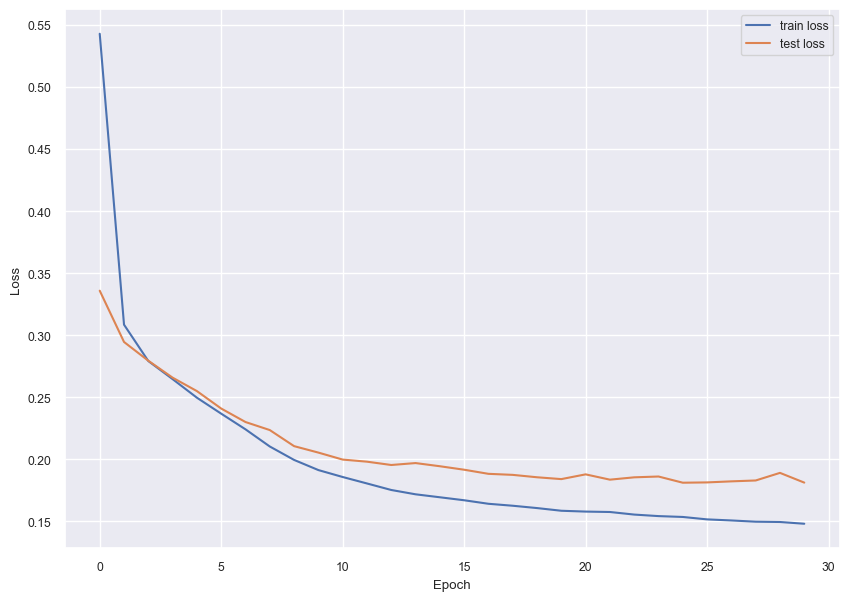

In [86]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), model_history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), model_history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
model.evaluate(X_test, y_test)

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1819 - mse: 0.1819


[0.18920008838176727, 0.18920008838176727]